In [56]:
from pyspark import SparkContext

sc = SparkContext("local", "PySpark")

In [57]:
print(f"The PySpark {sc.version} version is running...")

The PySpark 3.5.0 version is running...


In [58]:
import pyspark

spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [59]:
# Getting the path of the dataset
path = "C:\\Users\\shubh\\Downloads\\NYPD_Arrest_Data__Year_to_Date__20231014.csv"

In [60]:
# Reading the dataset and displaying it
df = spark.read.csv(path, header=True, inferSchema=True)
df.show()

+----------+-----------+-----+-------------------+-----+--------------+----------+----------+-----------+---------------+-----------------+---------+--------+--------------+----------+----------+----------------+-----------------+------------------------+
|ARREST_KEY|ARREST_DATE|PD_CD|            PD_DESC|KY_CD|     OFNS_DESC|  LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|     PERP_RACE|X_COORD_CD|Y_COORD_CD|        Latitude|        Longitude|New Georeferenced Column|
+----------+-----------+-----+-------------------+-----+--------------+----------+----------+-----------+---------------+-----------------+---------+--------+--------------+----------+----------+----------------+-----------------+------------------------+
| 263238742| 02/08/2023|  380|ROBBERY,CAR JACKING|  105|       ROBBERY|PL 1601003|         F|          K|             62|                0|    25-44|       F|         WHITE|    989904|    156928|       40.597407|       -73.979638|  

In [61]:
df.head(5)

[Row(ARREST_KEY=263238742, ARREST_DATE='02/08/2023', PD_CD=380, PD_DESC='ROBBERY,CAR JACKING', KY_CD=105, OFNS_DESC='ROBBERY', LAW_CODE='PL 1601003', LAW_CAT_CD='F', ARREST_BORO='K', ARREST_PRECINCT=62, JURISDICTION_CODE=0, AGE_GROUP='25-44', PERP_SEX='F', PERP_RACE='WHITE', X_COORD_CD=989904, Y_COORD_CD=156928, Latitude=40.597407, Longitude=-73.979638, New Georeferenced Column='POINT (-73.979638 40.597407)'),
 Row(ARREST_KEY=265590985, ARREST_DATE='03/24/2023', PD_CD=155, PD_DESC='RAPE 2', KY_CD=104, OFNS_DESC='RAPE', LAW_CODE='PL 1303001', LAW_CAT_CD='F', ARREST_BORO='S', ARREST_PRECINCT=120, JURISDICTION_CODE=0, AGE_GROUP='18-24', PERP_SEX='M', PERP_RACE='BLACK', X_COORD_CD=962873, Y_COORD_CD=174172, Latitude=40.6447209438691, Longitude=-74.0770327198983, New Georeferenced Column='POINT (-74.0770327198983 40.6447209438691)'),
 Row(ARREST_KEY=265798132, ARREST_DATE='03/28/2023', PD_CD=157, PD_DESC='RAPE 1', KY_CD=104, OFNS_DESC='RAPE', LAW_CODE='PL 1303501', LAW_CAT_CD='F', ARREST_BO

In [62]:
df.printSchema()

root
 |-- ARREST_KEY: integer (nullable = true)
 |-- ARREST_DATE: string (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- KY_CD: integer (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: integer (nullable = true)
 |-- JURISDICTION_CODE: integer (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- New Georeferenced Column: string (nullable = true)



In [63]:
summary_stats = df.describe().toPandas()
print(summary_stats)

  summary            ARREST_KEY ARREST_DATE               PD_CD  \
0   count                112571      112571              112110   
1    mean  2.6604182562875873E8        None  425.56285790741236   
2  stddev     2753892.931712856        None   276.2386877607132   
3     min             261180920  01/01/2023                  12   
4     max             270661337  06/30/2023                 997   

                      PD_DESC               KY_CD                 OFNS_DESC  \
0                      112571              112105                    112571   
1                        None  249.99966103206816                      None   
2                        None  147.86080691735023                      None   
3                      (null)                 101                    (null)   
4  WEAPONS,MFR,TRANSPORT,ETC.                 995  VEHICLE AND TRAFFIC LAWS   

     LAW_CODE LAW_CAT_CD ARREST_BORO     ARREST_PRECINCT   JURISDICTION_CODE  \
0      112571     111725      112571      

In [64]:
from pyspark.sql.functions import count, when, col

# Check for missing values in each column
missing_data = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Show columns with missing values
missing_data.show()

+----------+-----------+-----+-------+-----+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+---------+------------------------+
|ARREST_KEY|ARREST_DATE|PD_CD|PD_DESC|KY_CD|OFNS_DESC|LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|PERP_RACE|X_COORD_CD|Y_COORD_CD|Latitude|Longitude|New Georeferenced Column|
+----------+-----------+-----+-------+-----+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+---------+------------------------+
|         0|          0|  461|      0|  466|        0|       0|       846|          0|              0|                0|        0|       0|        0|         0|         0|       0|        0|                       0|
+----------+-----------+-----+-------+-----+---------+--------+----------+-----------+---------------+-----------------+---------+------

In [65]:
# Drop rows with any missing values
df_cleaned = df.dropna()

In [66]:
# Checking for missing values in each column
missing_data = df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned.columns])

# Show columns with missing values
missing_data.show()

+----------+-----------+-----+-------+-----+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+---------+------------------------+
|ARREST_KEY|ARREST_DATE|PD_CD|PD_DESC|KY_CD|OFNS_DESC|LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|PERP_RACE|X_COORD_CD|Y_COORD_CD|Latitude|Longitude|New Georeferenced Column|
+----------+-----------+-----+-------+-----+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+---------+------------------------+
|         0|          0|    0|      0|    0|        0|       0|         0|          0|              0|                0|        0|       0|        0|         0|         0|       0|        0|                       0|
+----------+-----------+-----+-------+-----+---------+--------+----------+-----------+---------------+-----------------+---------+------

In [67]:
# Checking for duplicates
duplicates = df_cleaned.dropDuplicates()

# Count the number of duplicate rows
duplicate_count = df_cleaned.count() - duplicates.count()

if duplicate_count > 0:
    print(f"Number of duplicate rows: {duplicate_count}")
else:
    print("No duplicate rows found")

No duplicate rows found


In [68]:
df_cleaned.show()

+----------+-----------+-----+-------------------+-----+--------------+----------+----------+-----------+---------------+-----------------+---------+--------+--------------+----------+----------+----------------+-----------------+------------------------+
|ARREST_KEY|ARREST_DATE|PD_CD|            PD_DESC|KY_CD|     OFNS_DESC|  LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|     PERP_RACE|X_COORD_CD|Y_COORD_CD|        Latitude|        Longitude|New Georeferenced Column|
+----------+-----------+-----+-------------------+-----+--------------+----------+----------+-----------+---------------+-----------------+---------+--------+--------------+----------+----------+----------------+-----------------+------------------------+
| 263238742| 02/08/2023|  380|ROBBERY,CAR JACKING|  105|       ROBBERY|PL 1601003|         F|          K|             62|                0|    25-44|       F|         WHITE|    989904|    156928|       40.597407|       -73.979638|  

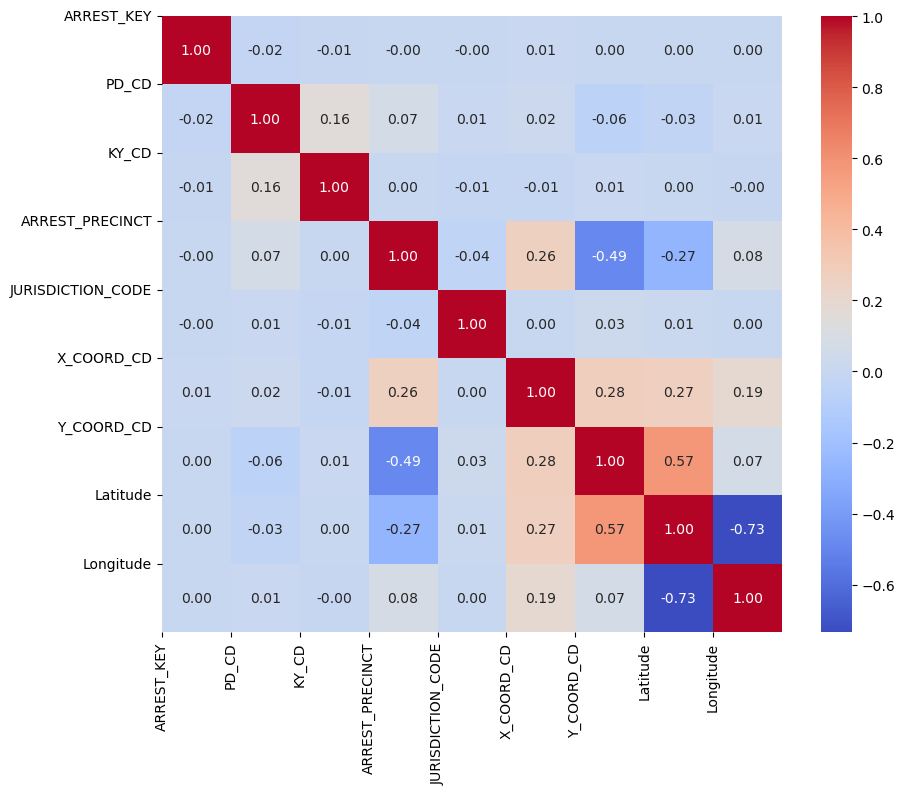

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numeric columns you want to include in the correlation matrix
numeric_cols = df_cleaned.select([col for col, dtype in df_cleaned.dtypes if dtype in ['double', 'int']]).columns

# Create a correlation matrix
corr_matrix = df_cleaned.select(numeric_cols).toPandas().corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the column names as x and y labels
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)

# Display the plot
plt.show()


# Data Modelling

In [70]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load your dataset
data = df_cleaned

# Define the feature columns
string_feature_columns = ["OFNS_DESC", "PD_DESC","AGE_GROUP","LAW_CAT_CD","ARREST_BORO", "PERP_SEX", "PERP_RACE"]
numerical_feature_columns = ["X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "ARREST_PRECINCT", "PD_CD"]

# Convert string columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in string_feature_columns]
pipeline = Pipeline(stages=indexers)

data = pipeline.fit(data).transform(data)

# Combine all feature columns into a single vector column with a different name
feature_columns = numerical_feature_columns + [col + "_index" for col in string_feature_columns]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

In [71]:
from pyspark.ml.classification import LogisticRegression

# Create a Logistic Regression model
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="features", labelCol="PERP_SEX_index")

# Fit the model to the training data
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="PERP_SEX_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 80.8305991280507%


In [72]:
from pyspark.ml.classification import RandomForestClassifier

# Create a Random Forest Classifier model
rf = RandomForestClassifier(numTrees=10, maxBins=300, featuresCol="features", labelCol="PERP_SEX_index")

# Fit the model to the training data
model = rf.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="PERP_SEX_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy * 100}%")


Accuracy: 99.84718414310755%


In [74]:
from pyspark.ml.classification import LogisticRegression

# Create a Logistic Regression model
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="features", labelCol="ARREST_BORO_index")

# Fit the model to the training data
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="ARREST_BORO_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 79.37884848757247%


In [75]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Load your data from a DataFrame
data = df_cleaned

# Data preprocessing
# Convert categorical columns to numerical using StringIndexer
string_cols = ["ARREST_BORO", "AGE_GROUP", "PERP_SEX", "PERP_RACE", "OFNS_DESC", "LAW_CAT_CD"]  # Include the target column
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in string_cols]

# One-hot encode categorical variables
encoder = OneHotEncoder(inputCol="OFNS_DESC_index", outputCol="OFNS_DESC_encoded")

# Assemble features into a single vector column
input_cols = ["KY_CD", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "ARREST_BORO_index", "AGE_GROUP_index", "PERP_SEX_index", "PERP_RACE_index"]
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Define the classifier
classifier = LogisticRegression(labelCol="LAW_CAT_CD_index", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=indexers + [encoder, assembler, classifier])

# Fit the model
model = pipeline.fit(data)

# Make predictions on the data
predictions = model.transform(data)

# Evaluate accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="LAW_CAT_CD_index", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy * 100}%")


Accuracy: 98.82166835941362%


In [76]:
# Stopping the SparkSession
spark.stop()